# Evalution and Analysis

## Imports:

In [144]:
from pathlib import Path

## Get predictions and metrics:

In [145]:
from Helper.evaluation_helpers import get_predictions, calc_metrics

## Supress warnings

In [146]:
import warnings
warnings.filterwarnings("ignore") 

In [147]:
predsPath= Path('../Predictions/')
predsDf=get_predictions(predsPath)
display(predsDf)

ground_truth  ARIMAX2000        ARDL  SARIMAX2000  \
observation_date                                                      
01/2024                122.115  121.860320  105.785040   121.845030   
02/2024                122.494  122.251198  105.785040   122.224498   
03/2024                122.912  122.653228  105.785040   122.548902   
04/2024                123.234  123.060701  105.860227   122.938665   
05/2024                123.224  123.264980  106.270458   123.090847   
06/2024                123.369  123.383008  106.605603   123.231504   
07/2024                123.575  123.589756  106.960277   123.468821   
08/2024                123.727  123.659495  107.328459   123.620677   
09/2024                123.939  123.674133  107.671517   123.692794   
10/2024                124.235  123.785058  107.954837   123.887937   
11/2024                124.387  123.900526  108.216906   124.073480   
12/2024                124.705  124.064670  108.290666   124.387902   

                  SARIMA2000         GRU   ARIMA1990       NHITS  ARIMAX1990  \
observation_date                                                               
01/2024           121.825091  104.798742  121.865489  121.996834  121.828587   
02/2024           122.064401  104.614738  122.135733  122.189484  122.201818   
03/2024           122.305672  104.392772  122.405977  122.523796  122.580599   
04/2024           122.588610  104.176452  122.676221  122.811935  122.980798   
05/2024           122.859555  103.988449  122.946465  123.056259  123.198546   
06/2024           123.057705  103.839441  123.216709  123.217255  123.345934   
07/2024           123.410391  103.721934  123.486953  123.438248  123.590490   
08/2024           123.696499  103.626826  123.757197  123.640480  123.691117   
09/2024           123.976322  103.544718  124.027441  123.933266  123.748932   
10/2024           124.285906  103.465741  124.297685  124.193130  123.891986   
11/2024           124.622106  103.384115  124.567929  124.419678  124.051121   
12/2024           124.942193  103.295445  124.838173  124.627083  124.246747   

                   Naive     NBEATSx  SARIMAX1990  SARIMA1990         MLR  \
observation_date                                                            
01/2024           105.69  121.846504   121.811013  121.830877  106.121323   
02/2024           105.69  122.120865   122.201975  122.078725  106.247963   
03/2024           105.69  122.287407   122.509162  122.329628  106.374603   
04/2024           105.69  122.503059   122.895298  122.615530  106.501243   
05/2024           105.69  122.831955   123.050231  122.893196  106.627884   
06/2024           105.69  123.020706   123.196305  123.105805  106.754524   
07/2024           105.69  123.285072   123.448668  123.456398  106.881164   
08/2024           105.69  123.524452   123.623750  123.746242  107.007804   
09/2024           105.69  123.663605   123.704845  124.029698  107.134444   
10/2024           105.69  123.798004   123.894474  124.342968  107.261084   
11/2024           105.69  124.057312   124.094127  124.680217  107.387724   
12/2024           105.69  124.244492   124.431316  125.002496  107.514364   

                   ARIMA2000  
observation_date              
01/2024           121.865276  
02/2024           122.162382  
03/2024           122.474494  
04/2024           122.793262  
05/2024           123.114981  
06/2024           123.438010  
07/2024           123.761619  
08/2024           124.085487  
09/2024           124.409468  
10/2024           124.733500  
11/2024           125.057554  
12/2024           125.381619

# Calculate Metrics:

In [148]:
# metric DataFrames are sorted by the main metric before being displayed
main_metric = 'RMSE'

## Horizon = 1

In [149]:
# WARNING: r2 is not well defined for less than 2 samples
metrics_1= calc_metrics(predsDf, horizon=1).drop('r2', axis=1)
display(metrics_1.sort_values(main_metric, axis=0))

,RMSE,MAE
NHITS,0.118166,0.118166
ARIMA1990,0.249511,0.249511
ARIMA2000,0.249724,0.249724
ARIMAX2000,0.25468,0.25468
NBEATSx,0.268496,0.268496
SARIMAX2000,0.26997,0.26997
SARIMA1990,0.284123,0.284123
ARIMAX1990,0.286413,0.286413
SARIMA2000,0.289909,0.289909
SARIMAX1990,0.303987,0.303987


## Horizon = 3

In [150]:
metrics_3= calc_metrics(predsDf, horizon=3)
display(metrics_3.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
ARIMAX2000,0.252176,0.252085,0.399803
NHITS,0.292914,0.270295,0.190218
ARIMAX1990,0.30399,0.303332,0.127819
SARIMAX2000,0.304059,0.300857,0.127424
SARIMAX1990,0.336633,0.33295,-0.069552
ARIMA2000,0.348207,0.339616,-0.14436
ARIMA1990,0.385863,0.371267,-0.40525
SARIMA1990,0.444348,0.427257,-0.863526
NBEATSx,0.447749,0.422075,-0.892154
SARIMA2000,0.46052,0.441945,-1.001638


## Horizon = 6

In [151]:
metrics_6= calc_metrics(predsDf, horizon=6)
display(metrics_6.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
ARIMAX2000,0.192651,0.16409,0.817058
ARIMAX1990,0.238929,0.201953,0.71861
SARIMAX2000,0.25859,0.244759,0.670393
NHITS,0.284809,0.25874,0.600165
SARIMAX1990,0.292889,0.280669,0.577158
ARIMA2000,0.309473,0.272936,0.527917
ARIMA1990,0.378155,0.350234,0.295126
SARIMA1990,0.438472,0.415707,0.052333
SARIMA2000,0.462329,0.441161,-0.053598
NBEATSx,0.484891,0.456251,-0.158941


## Horizon = 12

In [152]:
metrics_12= calc_metrics(predsDf, horizon=12)
display(metrics_12.sort_values(main_metric, axis=0))

,RMSE,MAE,r2
NHITS,0.208529,0.161159,0.919329
SARIMAX2000,0.258796,0.242079,0.875749
ARIMAX1990,0.261509,0.215859,0.873131
SARIMAX1990,0.269689,0.25457,0.865069
ARIMA1990,0.278222,0.22374,0.856396
ARIMAX2000,0.309131,0.242368,0.822716
SARIMA1990,0.33694,0.285122,0.789385
SARIMA2000,0.344726,0.28355,0.779538
ARIMA2000,0.419849,0.374905,0.672983
NBEATSx,0.420651,0.394381,0.671732


# Analysis:

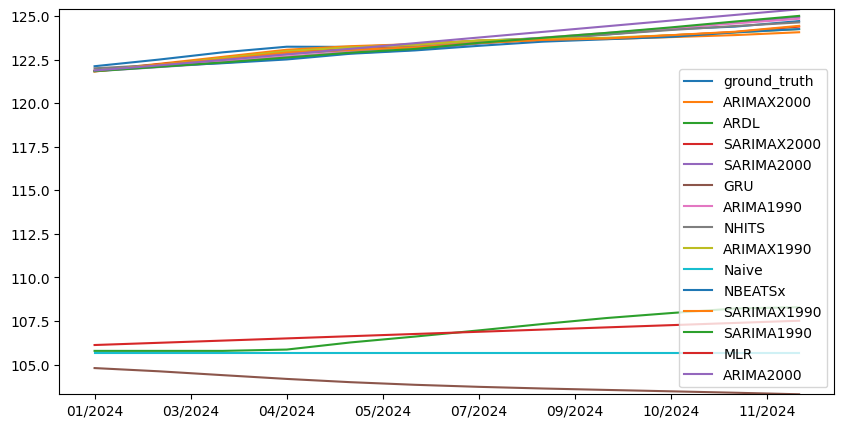

In [153]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.locator_params(axis='x', nbins=10)

for model in predsDf.columns:
    plt.plot(predsDf.index, predsDf[model])

plt.ylim(predsDf.drop('ARDL', axis=1).min(axis=0).min(), predsDf.drop('ARDL', axis=1).max(axis=0).max())
plt.legend(predsDf.columns)
plt.show()

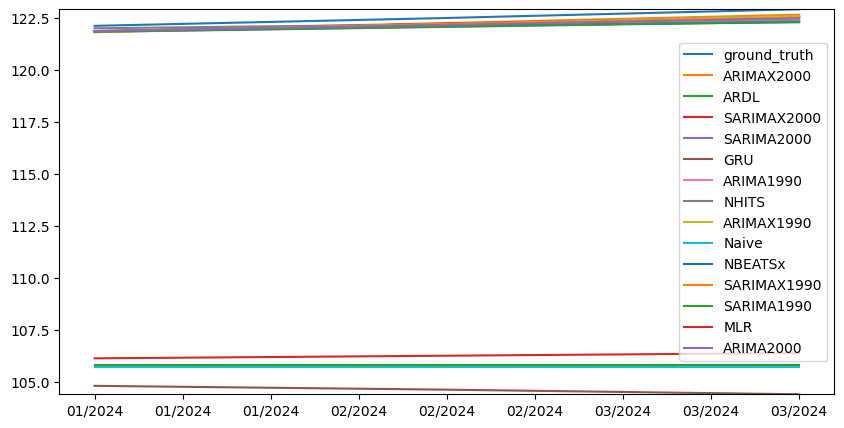

In [154]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.locator_params(axis='x', nbins=10)

for model in predsDf.columns:
    plt.plot(predsDf.index[:int(len(predsDf)/4)], predsDf[model][:int(len(predsDf)/4)])

plt.ylim(predsDf[:int(len(predsDf)/4)].drop('ARDL', axis=1).min(axis=0).min(), predsDf[:int(len(predsDf)/4)].drop('ARDL', axis=1).max(axis=0).max())
plt.legend(predsDf.columns)
plt.show()